In [1]:
from astropy.io import fits 
import matplotlib.pyplot as plt
import astropy 
import numpy as np 
from flow import flowLCT
%matplotlib inline

(20, 275, 274)

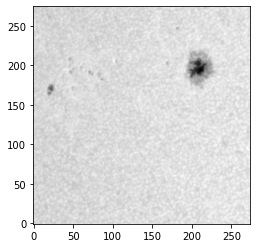

In [2]:
cube = fits.getdata('/Volumes/VALERIA/AUSUS/Documents/MOAT/Cubos/cubealign.fits')

plt.imshow(cube[10,:,:], cmap='gray', origin ='lower')
#plt.imshow(cube[10,0:128,145:274], cmap='gray')
#plt.imshow(cube[19,135:264,146:274], cmap='gray')
cube.shape

$\color{orange}{\text{________________________________________________________________________________________________________________________}}$

# Sección MOAT 

(20, 139, 138)

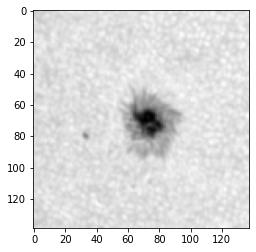

In [3]:
cubemoat = cube[:,125:264,136:274]

plt.imshow(cubemoat[19,:,:], cmap='gray')

cubemoat.shape

(139, 138)
56066.0956807602


(array([68]), array([50]))

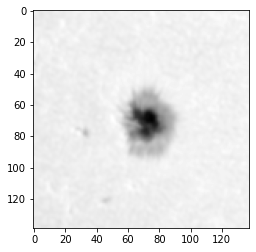

In [4]:
Average_cubemoat = np.mean(cubemoat[:20],axis=0)

plt.imshow(Average_cubemoat, cmap='gray')

print(Average_cubemoat.shape)

print(np.max(Average_cubemoat))

np.where(Average_cubemoat==np.max(Average_cubemoat))

In [5]:
#Calculo de velocidades con LCT

velcubemoat = flowLCT(cubemoat[0:20], 5, 0.504, 720)

vx = velcubemoat.vx
vy = velcubemoat.vy
vz = velcubemoat.vz

print(np.min(vx))
print(np.mean(vx))
print(np.max(vx))
#print(vx)

-0.2817892964634688
-2.222529670816704e-18
0.2842052364982968


In [6]:
#Se crean las matrices para generar la red en la que se van a dibujar las flechas

x = np.arange(0,138)
y = np.arange(0,139)

ejex=x*0.504
ejey=y*0.504

X, Y = np.meshgrid(ejex, ejey)  #Matrices X y Y que van de 0 a 277 en sus filas y columnas

#Matrices que van a definir la dirección de la flecha, vx[0] son las vels de 0-30

u = vx.copy() #Para el histograma sin máscara
v = vy.copy() 

u2 = vx.copy() #Para el histograma con máscara
v2 = vy.copy()

print(np.min(u))
print(np.max(v))


-0.2817892964634688
0.34131074753686697


#### _Primer Histograma (Incluye velocidades internas de la mancha)_

0.062327051063418196


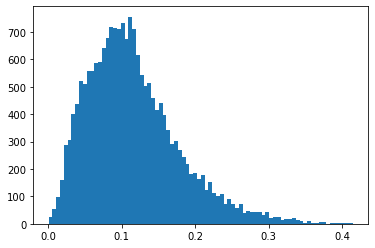

In [8]:
magnitud = np.sqrt((u)**2 + (v)**2)
print(np.std(magnitud))

#HISTOGRAMA

n, b, _ = plt.hist(np.ravel(magnitud), bins=80)
#plt.axvline(0.81, color='r')

#### Máscara que quita velocidades internas

In [9]:
v.shape

(139, 138)

In [10]:
#Mascara para eliminar velocidades dentro de la mancha 

u2[Average_cubemoat<50000]=np.nan
v2[Average_cubemoat<50000]=np.nan

#### _Segundo Histograma (SIN velocidades internas de la mancha)_

nan


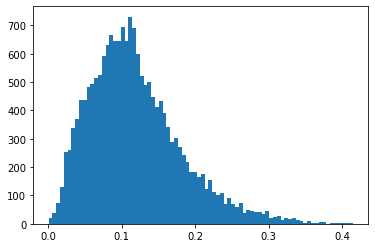

In [11]:
magnitud2 = np.sqrt((u2)**2 + (v2)**2)
print(np.std(magnitud2))

#HISTOGRAMA

n, b, _ = plt.hist(np.ravel(magnitud2), bins=80)
#plt.axvline(0.81, color='r')

### _Figura_

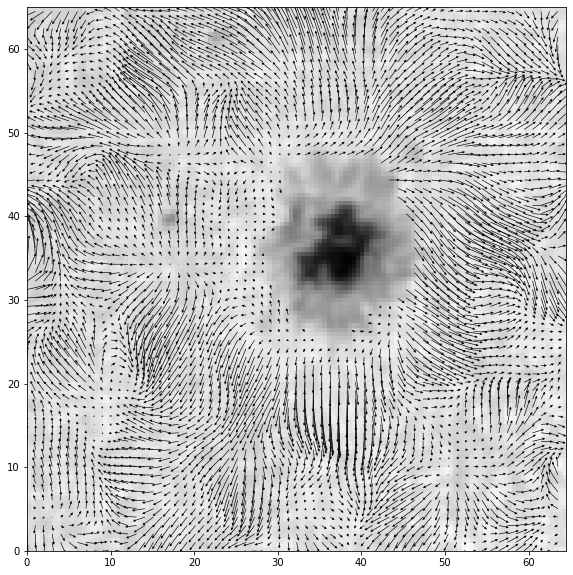

In [13]:
# Se hace la red de flechas de las velocidades 


fig, ax = plt.subplots(figsize=(10,10))


Q = ax.quiver(X[0:129,0:128][::2,::2],Y[0:129,0:128][::2,::2],u2[0:129,0:128][::2,::2],v2[0:129,0:128][::2,::2], color='black', alpha=1, scale=5, headwidth= 4, headlength=4, width=0.0012)
plt.imshow(cubemoat[15,0:129,0:128],cmap='gray',origin='lower',extent=(0*0.504,128*0.504,0*0.504,129*0.504))

#plt.savefig('VelocityMOAT6HOURS.pdf')

$\color{deeppink}{\text{________________________________________________________________________________________________________________________}}$

$\color{deeppink}{\text{________________________________________________________________________________________________________________________}}$

$\color{deeppink}{\star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star   }$

$\color{orange}{\text{________________________________________________________________________________________________________________________}}$

# Sección QUIET ZONE

(20, 168, 169)

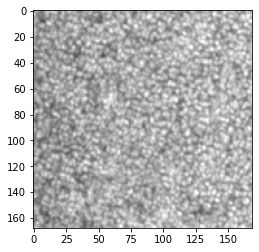

In [14]:
cubequiet = cube[:,0:168,105:274]

plt.imshow(cubequiet[19,:,:], cmap='gray', vmin=45000, vmax=58000)
cubequiet.shape

(168, 169)


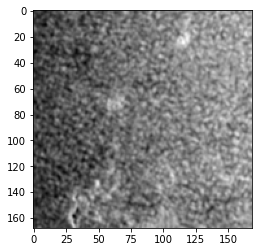

In [15]:
Promedio_cubequiet = np.mean(cubequiet[:20],axis=0)
print(Promedio_cubequiet.shape)

plt.imshow(Promedio_cubequiet, cmap='gray')

In [16]:
velcubequiet = flowLCT(cubequiet[0:20], 5, 0.504, 720)

vxquiet = velcubequiet.vx
vyquiet = velcubequiet.vy
vzquiet = velcubequiet.vz

print(np.min(vxquiet))
print(np.mean(vxquiet))
print(np.std(vxquiet))
print(np.mean(vyquiet))
print(np.std(vyquiet))
#print(vx)

-0.5921459928806645
-1.0010464014653426e-18
0.10449379513831217
0.0
0.15169923646796396


In [17]:
#Se crean las matrices para generar la red en la que se van a dibujar las flechas

xquiet = np.arange(0,128)
yquiet = np.arange(0,129)

ejexquiet=xquiet*0.504
ejeyquiet=yquiet*0.504

Xquiet, Yquiet = np.meshgrid(ejexquiet, ejeyquiet)  #Matrices X y Y que van de 0 a 274 y de 0 a 275 en sus filas y columnas

uquiet = vxquiet.copy()  #Matrices que van a definir la dirección de la flecha, vx[0] son las vels de 0-30
vquiet = vyquiet.copy()

print(np.min(uquiet))
print(np.max(vquiet))

-0.5921459928806645
0.39615437250297264


0.76908227973038
0.10449379513831217


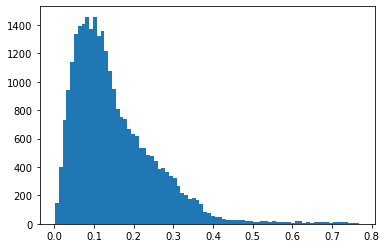

In [18]:
magnitudquiet = np.sqrt((uquiet)**2 + (vquiet)**2)

print(np.max(magnitudquiet))

print(np.std(uquiet))

n, b, _ = plt.hist(np.ravel(magnitudquiet), bins=80)
#plt.axvline(1.0, color='r')

$\color{deeppink}{\text{________________________________________________________________________________________________________________________}}$

$\color{deeppink}{\text{________________________________________________________________________________________________________________________}}$

$\color{deeppink}{\star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star \star   }$